In [ ]:
import pandas as pd

file_paths = [
    "/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_001.csv",
    "/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_002.csv",
    "/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_003.csv"
]

expected_columns = ['DateTime', 'Site_id', 'Cell_id', 'Region', 'KWH/hh (per half hour)']

for file_path in file_paths:
    df = pd.read_csv(file_path, nrows=5)  # Load a small sample
    missing_cols = [col for col in expected_columns if col not in df.columns]
    print(f"File: {file_path}")
    print(f"Missing columns: {missing_cols}\n")


File: /content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_001.csv
Missing columns: ['Site_id', 'Cell_id', 'Region', 'KWH/hh (per half hour)']

File: /content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_002.csv
Missing columns: ['Site_id', 'Cell_id', 'Region', 'KWH/hh (per half hour)']

File: /content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_003.csv
Missing columns: ['Site_id', 'Cell_id', 'Region', 'KWH/hh (per half hour)']



In [ ]:
def check_invalid_dates(column):
    invalid_dates = []
    for idx, value in enumerate(column):
        try:
            pd.to_datetime(value)
        except Exception as e:
            invalid_dates.append((idx, value, str(e)))
    return invalid_dates

# Check energy data for invalid DateTime
energy_data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)
invalid_dates = check_invalid_dates(energy_data['DateTime'])
print("Invalid DateTime entries:", invalid_dates[:10])  # Show first 10 issues


Invalid DateTime entries: [(0, '00:00:00 13,01,01', 'month must be in 1..12: 00:00:00 13,01,01, at position 0'), (1, '00:30:00 13,01,01', 'month must be in 1..12: 00:30:00 13,01,01, at position 0'), (2, '01:00:00 13,01,01', 'month must be in 1..12: 01:00:00 13,01,01, at position 0'), (3, '01:30:00 13,01,01', 'month must be in 1..12: 01:30:00 13,01,01, at position 0'), (4, '02:00:00 13,01,01', 'month must be in 1..12: 02:00:00 13,01,01, at position 0'), (5, '02:30:00 13,01,01', 'month must be in 1..12: 02:30:00 13,01,01, at position 0'), (6, '03:00:00 13,01,01', 'month must be in 1..12: 03:00:00 13,01,01, at position 0'), (7, '03:30:00 13,01,01', 'month must be in 1..12: 03:30:00 13,01,01, at position 0'), (8, '04:00:00 13,01,01', 'month must be in 1..12: 04:00:00 13,01,01, at position 0'), (9, '04:30:00 13,01,01', 'month must be in 1..12: 04:30:00 13,01,01, at position 0')]


In [ ]:
# Replace ',' with valid separators, fix formats
energy_data['DateTime'] = energy_data['DateTime'].str.replace(',', '-').str.strip()

# Parse DateTime while handling errors
energy_data['DateTime'] = pd.to_datetime(
    energy_data['DateTime'], errors='coerce', format='%d-%m-%y %H:%M:%S'
)

# Drop rows where DateTime could not be parsed
energy_data = energy_data.dropna(subset=['DateTime'])


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define file paths and expected columns
file_paths = [
    '/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_001.csv',
    '/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_002.csv',
    '/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_003.csv'
]
expected_columns = ['cell_id', 'DateTime', 'KWH/hh (per half hour)', 'site_id', 'region']

# Process each file
for file_path in file_paths:
    try:
        print(f"Processing {file_path}...")

        # Read the CSV file
        df = pd.read_csv(file_path)

        # Add missing columns
        for col in expected_columns:
            if col not in df.columns:
                print(f"Adding missing column: {col}")
                df[col] = None  # Add missing column with default value

        # Save the updated file back to the same path
        df.to_csv(file_path, index=False)
        print(f"Updated file saved: {file_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")



Mounted at /content/drive
Processing /content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_001.csv...
Adding missing column: KWH/hh (per half hour)
Error processing /content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_001.csv: [Errno 1] Operation not permitted: '/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_001.csv'
Processing /content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_002.csv...
Adding missing column: KWH/hh (per half hour)
Error processing /content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_002.csv: [Errno 1] Operation not permitted: '/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_002.csv'
Processing /content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_003.csv...
Adding missing column: 

In [ ]:
import pandas as pd

file_paths = [
    "/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_001.csv",
    "/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_002.csv",
    "/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_003.csv"
]

expected_columns = ['DateTime', 'Site_id', 'Cell_id', 'Region', 'KWH/hh (per half hour)']

# Function to clean data
def clean_data(file_path):
    df = pd.read_csv(file_path)

    # Ensure all columns exist
    for col in expected_columns:
        if col not in df.columns:
            df[col] = None  # Default value for missing columns

    # Fix DateTime format
    if 'DateTime' in df.columns:
        df['DateTime'] = df['DateTime'].str.replace(',', '-').str.strip()
        df['DateTime'] = pd.to_datetime(
            df['DateTime'], errors='coerce', format='%d-%m-%y %H:%M:%S'
        )
        df = df.dropna(subset=['DateTime'])  # Drop rows with invalid DateTime

    return df

# Clean and merge all files
energy_data = pd.concat([clean_data(file) for file in file_paths], ignore_index=True)


In [ ]:
import pandas as pd

# Load the energy consumption data
file_paths = [
    "/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_001.csv",
    "/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_002.csv",
    "/content/drive/MyDrive/data science carerha/Data/Final Project/Sites Energy Consumption Part_003.csv"
]

# Load the data and concatenate all files
energy_data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Clean the 'DateTime' column
energy_data['DateTime'] = energy_data['DateTime'].str.replace(',', '-')

# Now convert the 'DateTime' column to datetime format (hh:mm:ss dd-mm-yy)
energy_data['DateTime'] = pd.to_datetime(energy_data['DateTime'], format='%H:%M:%S %d-%m-%y', errors='coerce')

# Check the cleaned 'DateTime' column
print(energy_data['DateTime'].head())  # Ensure it's correctly formatted

# Drop rows where DateTime could not be parsed
energy_data = energy_data.dropna(subset=['DateTime'])

# Load power demand data from the Excel file
demand_data = pd.read_excel("/content/drive/MyDrive/data science carerha/Data/Final Project/Demand.xlsx")

# Convert 'DemandDateTime' to datetime format
demand_data['DemandDateTime'] = pd.to_datetime(demand_data['DemandDateTime'], errors='coerce')

# Drop rows with missing 'DemandDateTime' values
demand_data = demand_data.dropna(subset=['DemandDateTime'])

# Check the date range overlap
print(f"Energy DateTime range: {energy_data['DateTime'].min()} to {energy_data['DateTime'].max()}")
print(f"Demand DateTime range: {demand_data['DemandDateTime'].min()} to {demand_data['DemandDateTime'].max()}")

# Sort both datasets by their DateTime columns
energy_data = energy_data.sort_values('DateTime')
demand_data = demand_data.sort_values('DemandDateTime')

# Perform the merge based on nearest DateTime values
merged_data = pd.merge_asof(energy_data, demand_data,
                            left_on='DateTime', right_on='DemandDateTime',
                            direction='nearest')

# Check the result of the merge
print(merged_data.head())


0   2001-01-13 00:00:00
1   2001-01-13 00:30:00
2   2001-01-13 01:00:00
3   2001-01-13 01:30:00
4   2001-01-13 02:00:00
Name: DateTime, dtype: datetime64[ns]
Energy DateTime range: 2001-01-13 00:00:00 to 2012-12-13 23:30:00
Demand DateTime range: 2013-01-01 00:00:00 to 2013-12-31 23:30:00
     cell_id   DateTime  KWH/hh (per half hour)  site_id region  \
0  MAC000002 2001-01-13                    0.219       A      A   
1  MAC000086 2001-01-13                    0.265       E      A   
2  MAC000016 2001-01-13                    0.025       K      B   
3  MAC000018 2001-01-13                    0.187       E      A   
4  MAC000085 2001-01-13                    0.591       D      A   

  DemandDateTime  Demand  
0     2013-01-01  Normal  
1     2013-01-01  Normal  
2     2013-01-01  Normal  
3     2013-01-01  Normal  
4     2013-01-01  Normal  


In [ ]:
import scipy.stats as stats
print(merged_data.columns)


# Group by Region and calculate the average energy consumption
region_grouped = merged_data.groupby('region')['KWH/hh (per half hour) '].mean()

# Perform ANOVA test
f_stat, p_val = stats.f_oneway(*[group['KWH/hh (per half hour) '].values for name, group in merged_data.groupby('region')])

print(f"ANOVA test results: F-statistic = {f_stat}, p-value = {p_val}")
# Extract hour from DateTime
merged_data['Hour'] = merged_data['DateTime'].dt.hour

# Calculate Pearson correlation
correlation = merged_data[['Hour', 'KWH/hh (per half hour) ']].corr()
print(correlation)


Index(['cell_id', 'DateTime', 'KWH/hh (per half hour) ', 'site_id', 'region',
       'DemandDateTime', 'Demand'],
      dtype='object')
ANOVA test results: F-statistic = 38.83430935535937, p-value = 4.396990942096681e-25
                             Hour  KWH/hh (per half hour) 
Hour                     1.000000                 0.019649
KWH/hh (per half hour)   0.019649                 1.000000


In [ ]:
# Define the threshold for low energy consumption (e.g., 0.1 kWh)
low_consumption_threshold = 0.1

# Filter the cells with low energy consumption
low_consumption_cells = merged_data[merged_data['KWH/hh (per half hour) '] < low_consumption_threshold]

# Calculate the total saved energy (in kWh)
total_saved_energy = low_consumption_cells['KWH/hh (per half hour) '].sum()

# Calculate the cost savings based on the demand prices
# Assuming the 'Demand' column contains 'High', 'Normal', 'Low' for pricing
price_mapping = {
    'High': 77.21,  # per kWh
    'Normal': 19.46,  # per kWh
    'Low': 6.89  # per kWh
}

# Map demand prices
low_consumption_cells['Price'] = low_consumption_cells['Demand'].map(price_mapping)

# Calculate the total cost savings
low_consumption_cells['Cost Savings (EGP)'] = low_consumption_cells['KWH/hh (per half hour) '] * low_consumption_cells['Price']

# Calculate the total cost savings
total_cost_savings = low_consumption_cells['Cost Savings (EGP)'].sum()

print(f"Total energy saved (kWh): {total_saved_energy}")
print(f"Total cost savings (EGP): {total_cost_savings}")


Total energy saved (kWh): 10567.147000000003
Total cost savings (EGP): 205636.68062000003


<ipython-input-9-47bd122ddd12>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_consumption_cells['Price'] = low_consumption_cells['Demand'].map(price_mapping)
<ipython-input-9-47bd122ddd12>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_consumption_cells['Cost Savings (EGP)'] = low_consumption_cells['KWH/hh (per half hour) '] * low_consumption_cells['Price']


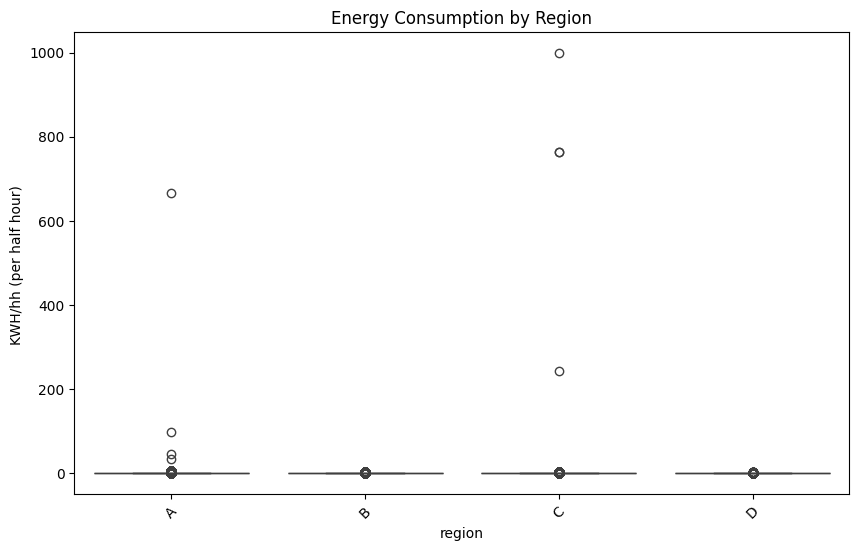

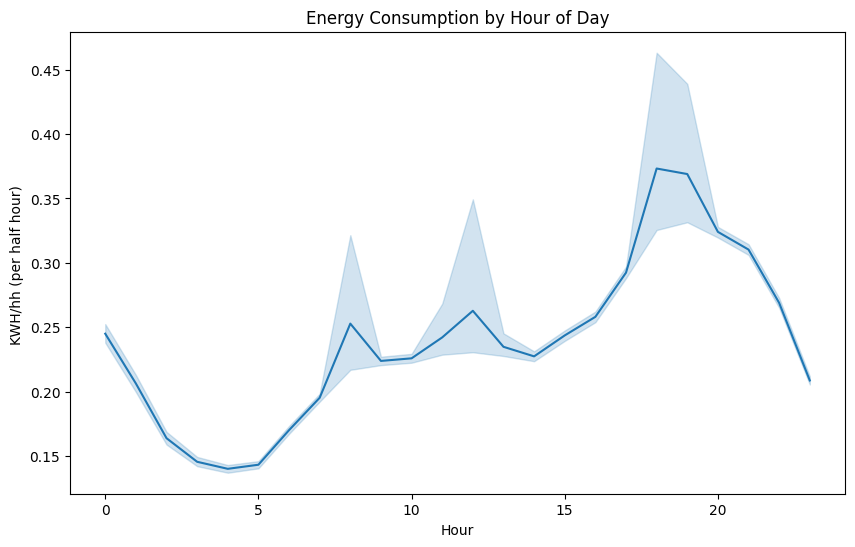

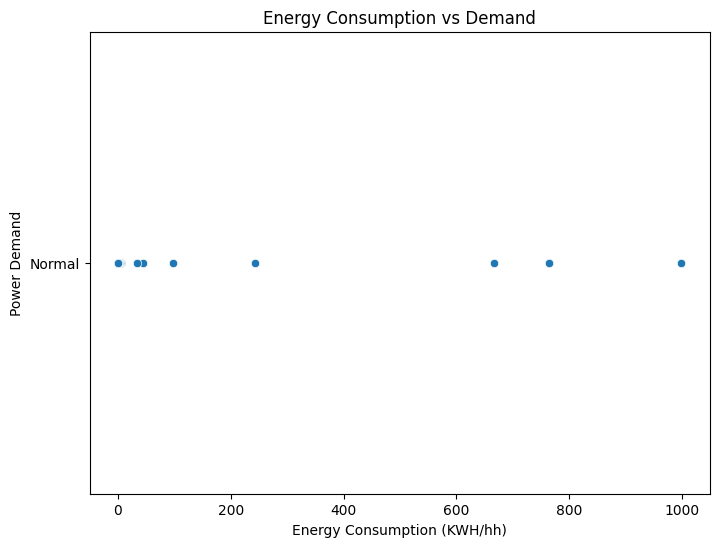

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of energy consumption by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='KWH/hh (per half hour) ', data=merged_data)
plt.title('Energy Consumption by Region')
plt.xticks(rotation=45)
plt.show()

# Plot the energy consumption by the hour of the day
merged_data['Hour'] = merged_data['DateTime'].dt.hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='KWH/hh (per half hour) ', data=merged_data)
plt.title('Energy Consumption by Hour of Day')
plt.show()

# Correlation between energy consumption and demand
plt.figure(figsize=(8, 6))
sns.scatterplot(x='KWH/hh (per half hour) ', y='Demand', data=merged_data)
plt.title('Energy Consumption vs Demand')
plt.xlabel('Energy Consumption (KWH/hh)')
plt.ylabel('Power Demand')
plt.show()


In [ ]:
!pip install dash jupyter-dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [23]:
from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd
import dash_table

# Assuming merged_data is already loaded and preprocessed
# Example of your merged_data dataframe
# merged_data = pd.read_excel("path_to_your_data.xlsx")

# Since all values in 'Demand' are 'Normal', assign the price for 'Normal' demand
merged_data['Price'] = 19.46  # Price for 'Normal' demand

# Calculate the energy cost
merged_data['Energy Cost'] = merged_data['KWH/hh (per half hour) '] * merged_data['Price']

# Group by region to calculate average energy cost
region_cost_grouped = merged_data.groupby('region').agg(
    avg_cost=('Energy Cost', 'mean')
).reset_index()

# Grouping data by region for the bar chart (average energy consumption per region)
region_grouped = merged_data.groupby('region')['KWH/hh (per half hour) '].mean().reset_index()

# Create the Dash app
app = Dash(__name__)

# Tariff Table Data
tariffs_data = pd.DataFrame({
    "Demand Level": ["High", "Normal", "Low"],
    "Price (EGP per kWh)": [77.21, 19.46, 6.89]
})

# App layout
app.layout = html.Div([
    html.H1("Energy Consumption and Cost Dashboard"),

    # Bar Chart for Energy Consumption by Region
    dcc.Graph(
        id='energy-consumption-region',
        figure=px.bar(region_grouped, x='region', y='KWH/hh (per half hour) ',
                      title="Average Energy Consumption by Region")
    ),

    # Bar Chart for Energy Cost by Region
    dcc.Graph(
        id='energy-cost-region',
        figure=px.bar(region_cost_grouped, x='region', y='avg_cost',
                      title="Average Energy Cost by Region")
    ),

    # Line chart for Energy Consumption over Time
    dcc.Graph(
        id='energy-consumption-time',
        figure=px.line(merged_data, x='DateTime', y='KWH/hh (per half hour) ',
                      title="Energy Consumption Over Time")
    ),

    # Line chart for Energy Cost over Time
    dcc.Graph(
        id='energy-cost-time',
        figure=px.line(merged_data, x='DateTime', y='Energy Cost',
                      title="Energy Cost Over Time")
    ),

    # Tariff Table
    html.H3("Energy Tariffs"),
    dash_table.DataTable(
        data=tariffs_data.to_dict('records'),
        columns=[{"name": col, "id": col} for col in tariffs_data.columns],
        style_table={'height': '300px', 'overflowY': 'auto'},
        style_cell={'textAlign': 'center', 'padding': '10px'},
        style_header={'backgroundColor': 'lightgrey', 'fontWeight': 'bold'}
    )
])

# Run the Dash app
app.run_server(mode='inline')


<ipython-input-23-b5602119bafb>:4: UserWarning:


The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`



<IPython.core.display.Javascript object>